## Spam detection

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords #Funcion para usar stopwords.
from nltk.tokenize import word_tokenize #Funcion para tokenizar.
#Tokenizar = romper en pedacitos. 
nltk.download("stopwords")
from sklearn.feature_extraction.text import CountVectorizer #Cuenta entidades en vectores
from sklearn.model_selection import train_test_split, cross_validate


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = pd.read_csv("../datasets/SPAM text message 20170820 - Data.csv")

## EDA + Feature engineering

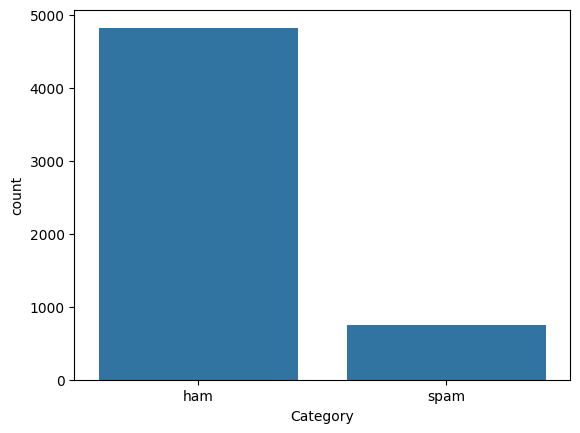

In [6]:
sns.countplot(data, x="Category") #1era observacion: Desbalance
plt.show()

In [7]:
for i in range(10):
    print(data.Message[i], data.Category[i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... ham
Ok lar... Joking wif u oni... ham
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's spam
U dun say so early hor... U c already then say... ham
Nah I don't think he goes to usf, he lives around here though ham
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv spam
Even my brother is not like to speak with me. They treat me like aids patent. ham
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune ham
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. spam
Had yo

In [8]:
nltk.download('punkt_tab') #Instalar esta (no me acuerdo qué hace)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Gabriel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
sw = set(stopwords.words("english")) #sw guarda las stopwords
def clean_text(text):
    text = text.lower() #Minúsculas
    text = word_tokenize(text, language="english") #Tokenizar -> Array de palabras
    text = [word for word in text if word.isalpha()] #Usar solo texto
    text = [word for word in text if word not in list(sw)] #Remove stopwords
    return " ".join(text) #Retornar como texto limpio
data["tokens"] = data.Message.map(clean_text)
data

,Category,Message,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time tried contact u pound prize claim easy ca...
5568,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [10]:
X = data["tokens"]
y = data["Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
cv = CountVectorizer(binary=False)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [11]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb.score(X_train, y_train)

0.9897104570471404

In [12]:
nb.score(X_test, y_test)

0.9777458722182341